# Assignment 3

**name:** Karl Frisk

**email:** kf222rj@student.lnu.se

In this Assignment, you will use Python to handle several exercises related the last 4 topics of the course.
All exercises are individual. 
We expect you to submit a Jupyter Notebook (i.e., pre-organized and provided through Moodle). 
Your submission should include all the datasets and files we need to run your programs (we will run your notebook). 
When grading your assignments, we will, in addition to functionality, also take into account code quality. 
We expect well-structured and efficient solutions.

## Lecture 6 - Decision Trees and Ensembles

**Dataset:** Bank Marketing Dataset (UCI)

**Variables description:** Check the bank-aditional-names.txt file

**Task Description:** Predict whether a client will subscribe to a term deposit (y column) based on marketing data.

### Task 1 (mandatory): Data Exploration and Preprocessing

Load and clean the dataset (bank-additional-full.csv). Encode categorical features. Split the dataset into training and testing sets.

**Plot:** Show class distribution (e.g., a print) of the target variable and a bar chart of the most frequent categorical values.

**Discuss:** Is the dataset imbalanced? Which features stand out?

--- Your answer here ---

I found the dataset to be unbalanced looking at the target value, but it is not too severe of an inbalance considering the 85:15 split.

Some other features are also unbalansed to some categories that basically don't occur (e.g. default, education).

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


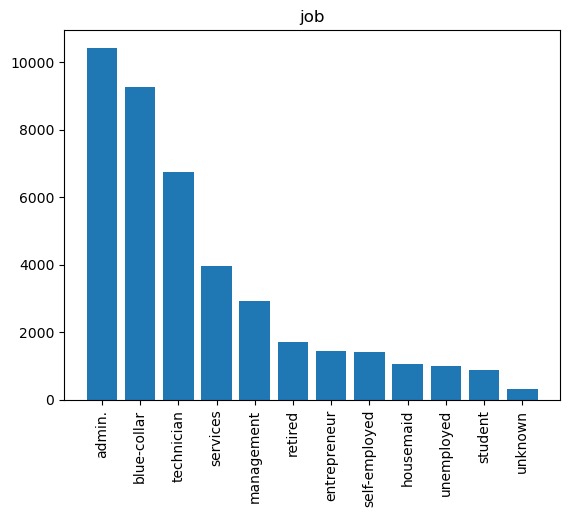

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


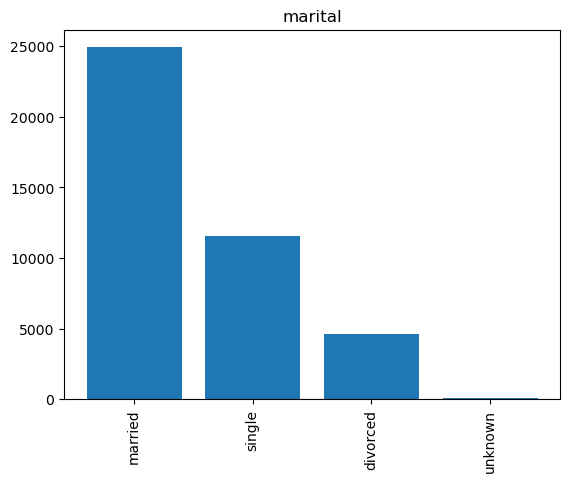

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


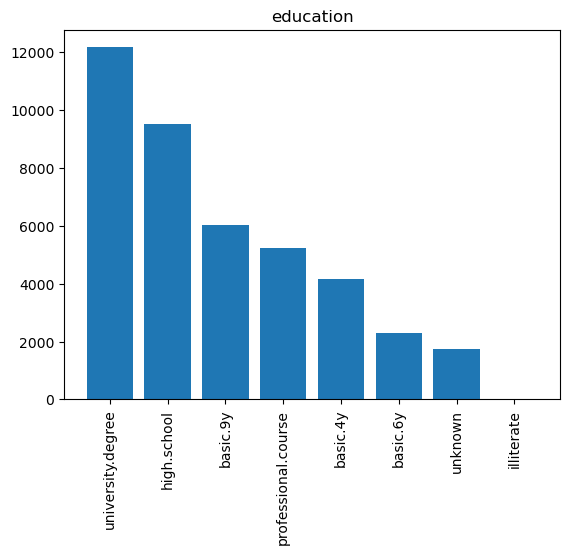

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


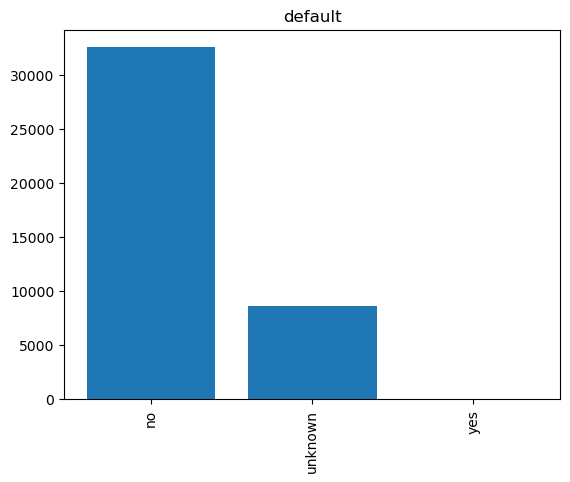

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


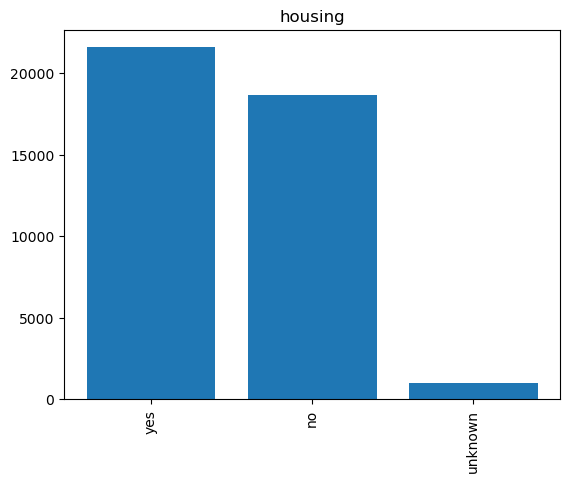

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


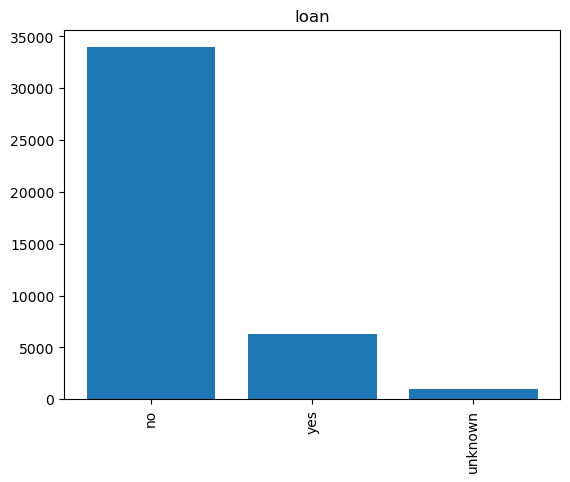

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


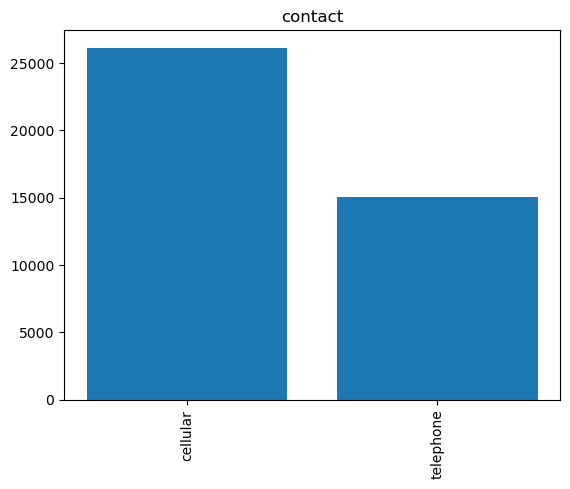

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


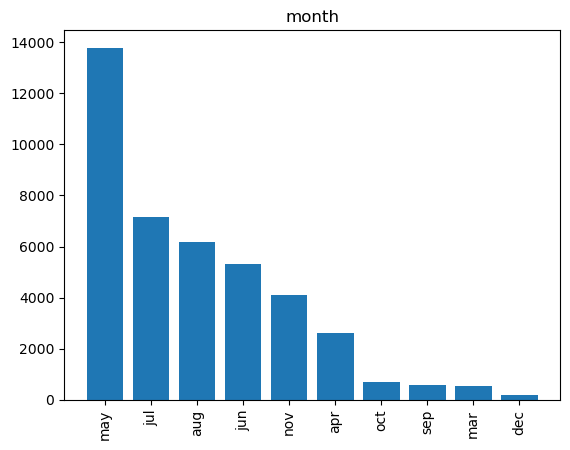

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


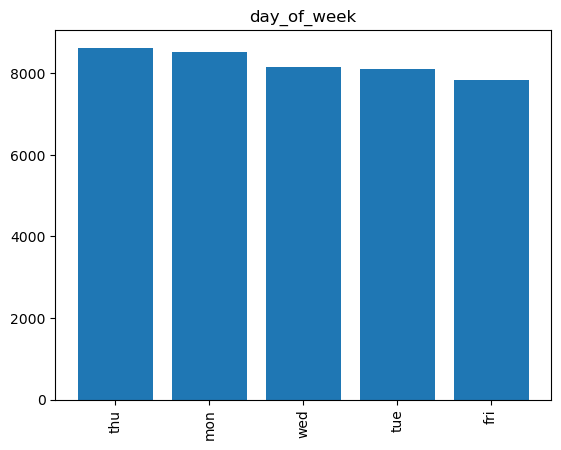

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


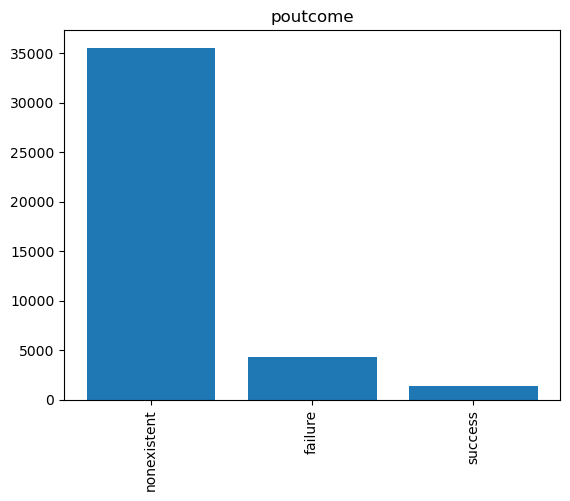

C:\Users\kalle\AppData\Local\Temp\ipykernel_23608\1580780156.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(map)


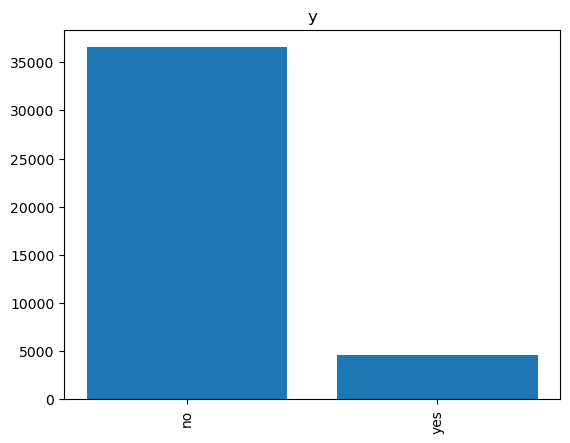

In [1]:
#--- Write your code here ---#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve
import random as rand

# Load dataset
df = pd.read_csv(r'datasets\BankMarketing\bank-additional-full.csv', delimiter=';')

# Select categorical data
class_columns = df.select_dtypes(include='object').columns

for nr, column in enumerate(df[class_columns]):
    counts = df[column].value_counts().to_dict()

    # Create dictionary map
    map = {k:0 for k in counts}
    for i, c in enumerate(map):
        map[c] = i
    
    # Encode the categorical data
    df[column] = df[column].replace(map)

    # Plot barcharts
    plt.figure(nr+1)
    plt.bar(counts.keys(), counts.values())
    plt.xticks(rotation=90)
    plt.title(column)
    plt.show()


### Task 2 (Mandatory): Train a decision tree using scikit-learn.

Use max depth = 4 for initial interpretability. Visualize the tree using plot_tree().

**Discuss:** Which features are used at the top levels of the tree? Are they intuitive? 

--- Your answer here ---

The features used at the top are the duration feature and the nr.employed feature.

The duration feature is understandable from the description of the feature and the nr.employed feature can also be rationalized by thinking that a person with more employees might be more inclined to take a loan to expand their operation.

[Text(0.5, 0.9, 'x[19] <= 5087.65\ngini = 0.2\nsamples = 32950\nvalue = [29245, 3705]'),
 Text(0.25, 0.7, 'x[10] <= 165.5\ngini = 0.494\nsamples = 3976\nvalue = [2199, 1777]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[12] <= 7.5\ngini = 0.274\nsamples = 1440\nvalue = [1204, 236]'),
 Text(0.0625, 0.3, 'x[11] <= 3.5\ngini = 0.478\nsamples = 190\nvalue = [115, 75]'),
 Text(0.03125, 0.1, 'gini = 0.49\nsamples = 173\nvalue = [99, 74]'),
 Text(0.09375, 0.1, 'gini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(0.1875, 0.3, 'x[10] <= 123.5\ngini = 0.224\nsamples = 1250\nvalue = [1089, 161]'),
 Text(0.15625, 0.1, 'gini = 0.141\nsamples = 825\nvalue = [762.0, 63.0]'),
 Text(0.21875, 0.1, 'gini = 0.355\nsamples = 425\nvalue = [327, 98]'),
 Text(0.375, 0.5, 'x[12] <= 15.5\ngini = 0.477\nsamples = 2536\nvalue = [995, 1541]'),
 Text(0.3125, 0.3, 'x[11] <= 6.5\ngini = 0.304\nsamples = 745\nvalue = [139, 606]'),
 Text(0.28125, 0.1, 'gini = 0.298\nsamples = 740\nvalue = [135, 605]'),
 Text(0.

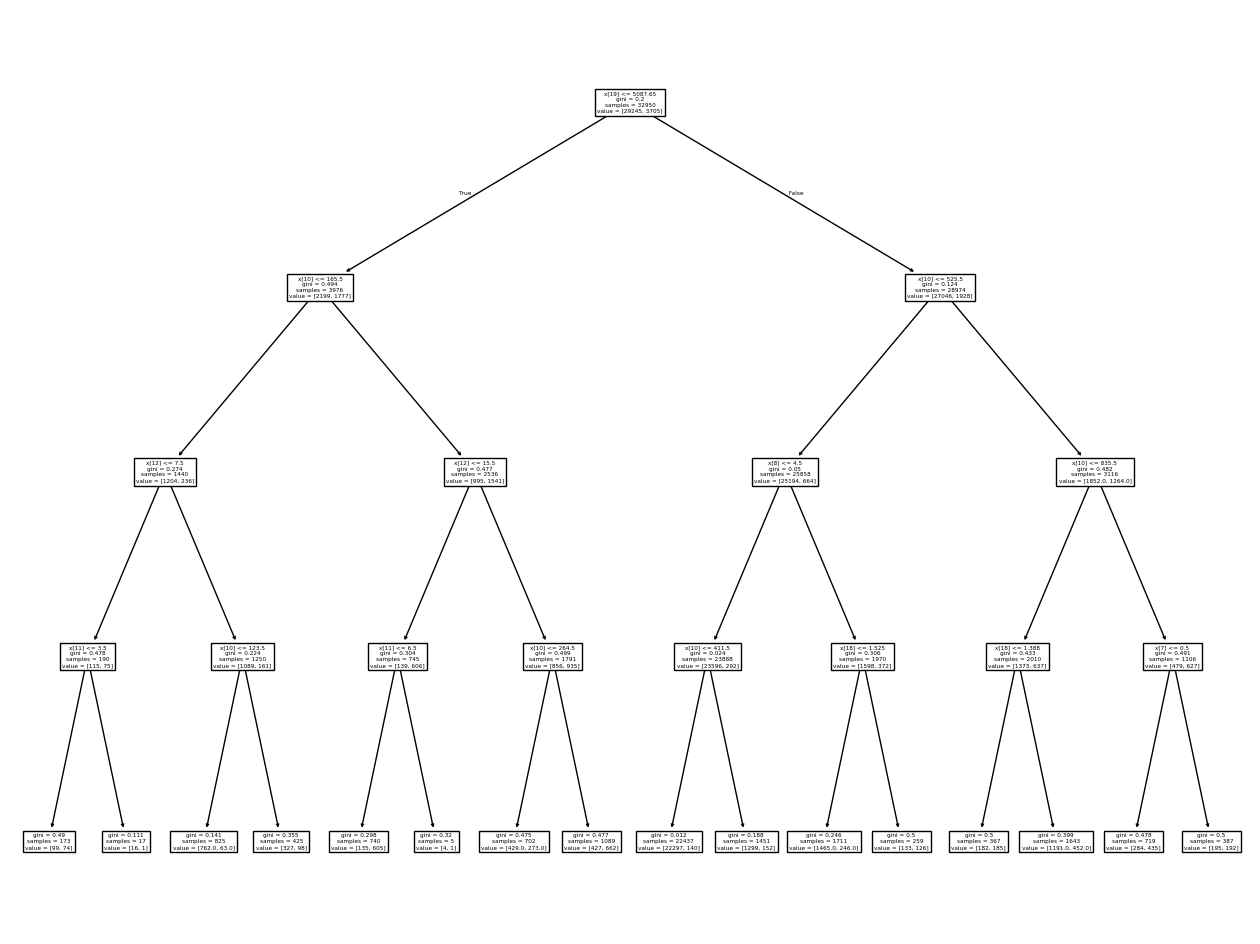

In [2]:
#--- Write your code here ---#

# Decision wether to include feature 'duration' or not
include_duration = True

if include_duration:
    X_mask = ~df.columns.isin(['y'])
else:
    X_mask = ~df.columns.isin(['y', 'duration'])

y_mask = df.columns.isin(['y'])

X = df.loc[:, X_mask].columns
y = df.loc[:, y_mask].columns
X = df[X].to_numpy()
y = df[y].to_numpy()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Run the model
clf = DecisionTreeClassifier(max_depth=4)

clf.fit(X_train, y_train)

# Plot the tree
plt.figure(1, figsize=[16, 12])
plot_tree(clf)

### Task 3 (mandatory): Evaluate Performance and Overfitting
Train the same tree with increasing depths (e.g., 2 to 10). Evaluate on both training and test sets using accuracy and F1 score. Plot Accuracy vs. depth and F1 vs. depth.

**Discuss:** Is there overfitting? Where does performance peak?

--- Your answer here ---

When looking at the training-score it is easy to see that there is overfitting as the model grows deeper as the accuracy and f1-score increases with depth while the test-score stays around the same with different depths.

It seems that performance peaks at a depth of three without overfitting too much.

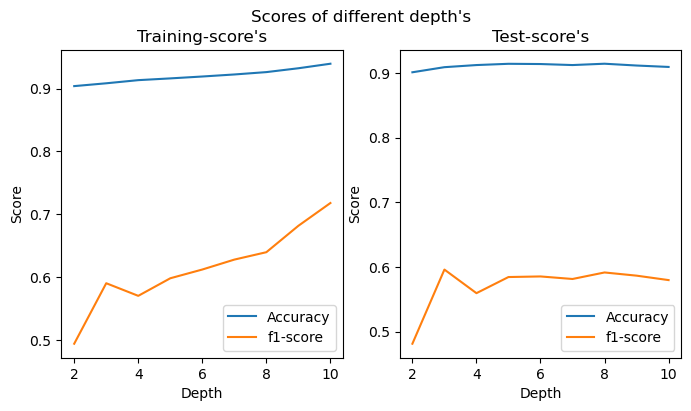

In [3]:
#--- Write your code here ---#

# Create dictionaries for score-keeping
score_train = {k:0 for k in np.linspace(2, 10, 9).astype(int)}
score_test = {k:0 for k in np.linspace(2, 10, 9).astype(int)}

# Run the model with different max_depth
for depth in score_train.keys():

    # Run the model
    clf = DecisionTreeClassifier(max_depth=depth)

    clf.fit(X_train, y_train)

    # Predict with the model on training and test data separately
    result_train = clf.predict(X_train)
    result_test = clf.predict(X_test)

    # Measure the models
    accuracy_train = metrics.accuracy_score(y_true=y_train, y_pred=result_train)
    f1_score_train = metrics.f1_score(y_true=y_train, y_pred=result_train)
    accuracy_test = metrics.accuracy_score(y_true=y_test, y_pred=result_test)
    f1_score_test = metrics.f1_score(y_true=y_test, y_pred=result_test)

    # Record the accuracy and f1-score
    score_train[depth] = [accuracy_train, f1_score_train]
    score_test[depth] = [accuracy_test, f1_score_test]

# Plot the findings
plt.figure(1, figsize=[8, 4])
plt.subplot(1, 2, 1)
plt.plot(score_train.keys(), score_train.values())
plt.title("Training-score's")
plt.xlabel('Depth')
plt.ylabel('Score')
plt.legend(['Accuracy', 'f1-score'])
plt.subplot(1, 2, 2)
plt.plot(score_test.keys(), score_test.values())
plt.title("Test-score's")
plt.xlabel('Depth')
plt.ylabel('Score')
plt.legend(['Accuracy', 'f1-score'])
plt.suptitle("Scores of different depth's")
plt.show()


### Task 4 (Mandatory): Train and Compare Ensembles
Train a Random Forest and a Gradient Boosting model.
Tune hyperparameters using grid search (e.g., max_depth, n_estimators).
Do a plot comparing the ROC curves of the three models (Tree, RF, GB).

**Discuss:** Which model performs best and why?

---- Your answers here ----

Clearly looking at the ROC-curves we see that the random forest and gradient boosted trees work much better that the decision tree, most likely from an increase in complexity and depth (not "tree depth", but more branching and hyperparameter tuning).

Which one that's better between random forest and gradient boosted I cannot say, but it seems that gradient boosted has a steeper curve near FPR = 0.

Best parameters random_forest: {'max_depth': 50, 'max_leaf_nodes': None, 'n_estimators': 400}
Best score random_forest: 0.9149013657056144
Best parameters gradient_boosted: {'learning_rate': 0.01, 'max_depth': 5, 'max_leaf_nodes': None, 'n_estimators': 400, 'n_iter_no_change': None}
Best score gradient_boosted: 0.9166312594840669


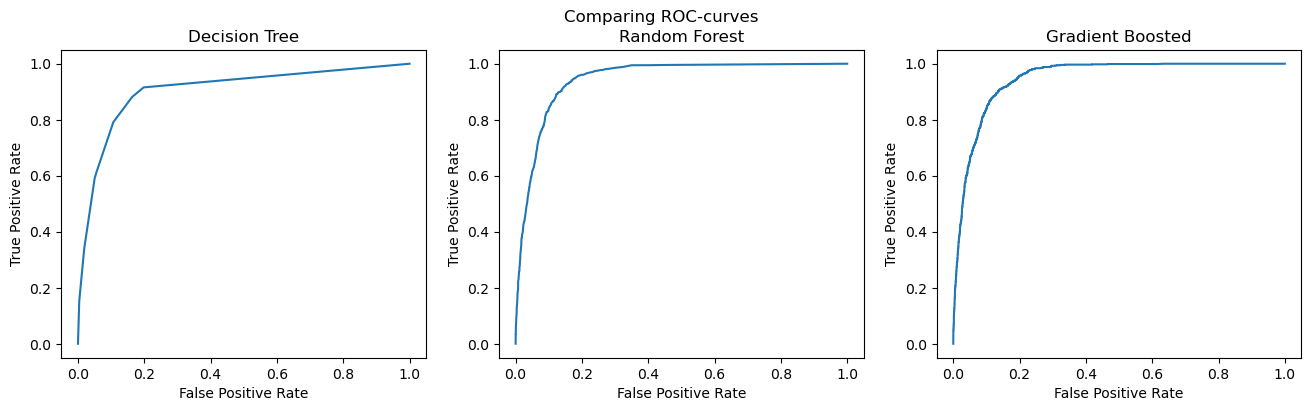

In [4]:
#--- Write your code here ---#

# Choice to only use the best found parameters instead of running the whole gridsearch
best_params = True

# Initiate all the different models with best performing max_depth for decision_tree
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosted = GradientBoostingClassifier(random_state=42)

# Create parameter space for the models
# Some parameters commented out for speed since they were easy to test 

if best_params:
    parameter_space_random_forest = {
        'max_depth': [50],
        'n_estimators': [400],
        'max_leaf_nodes': [None]
    }
    parameter_space_gradient_boosted = {
        'max_depth': [5],
        'n_estimators': [400],
        'max_leaf_nodes': [None],
        'learning_rate': [0.01],
        'n_iter_no_change': [None]
    }

else:
    parameter_space_random_forest = {
        'max_depth': [5, 10, 50],
        'n_estimators': [300, 400, 500],
        'max_leaf_nodes': [2, None]
    }
    parameter_space_gradient_boosted = {
        'max_depth': [5, 10, 50],
        'n_estimators': [300, 400, 500],
        'max_leaf_nodes': [2, None],
        'learning_rate': [0.1, 0.01, 0.001],
        'n_iter_no_change': [10, None],
        'tol': [1e-4, 1e-6]
    }

# Perform the gridsearch on the models
grid_search_random_forest = GridSearchCV(estimator=random_forest,
                           param_grid=parameter_space_random_forest,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')

grid_search_gradient_boosted = GridSearchCV(estimator=gradient_boosted,
                           param_grid=parameter_space_gradient_boosted,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy')

decision_tree.fit(X_train, y_train)
grid_search_random_forest.fit(X_train, y_train.ravel())
grid_search_gradient_boosted.fit(X_train, y_train.ravel())

# Print out the best metrics found
print("Best parameters random_forest:", grid_search_random_forest.best_params_)
print("Best score random_forest:", grid_search_random_forest.best_score_)

print("Best parameters gradient_boosted:", grid_search_gradient_boosted.best_params_)
print("Best score gradient_boosted:", grid_search_gradient_boosted.best_score_)

# Get the best models
best_random_forest = grid_search_random_forest.best_estimator_
best_gradient_boosted = grid_search_gradient_boosted.best_estimator_

# Predict the best models
prediction_decision_tree = decision_tree.predict_proba(X_test)
predictions_random_forest = best_random_forest.predict_proba(X_test)
predictions_gradient_boosted = best_gradient_boosted.predict_proba(X_test)

# Get the FPR and TPR of the models to plot the ROC-curve
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree = roc_curve(y_test.ravel(), prediction_decision_tree[:,1])
fpr_random_forest, tpr_random_forest, thresholds_random_forest = roc_curve(y_test.ravel(), predictions_random_forest[:,1])
fpr_gradient_boosted, tpr_gradient_boosted, thresholds_gradient_boosted = roc_curve(y_test.ravel(), predictions_gradient_boosted[:,1])


# Plot findings
plt.figure(1, figsize=[16, 4])
plt.subplot(1, 3, 1)
plt.plot(fpr_decision_tree, tpr_decision_tree)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree')
plt.subplot(1, 3, 2)
plt.plot(fpr_random_forest, tpr_random_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.subplot(1, 3, 3)
plt.plot(fpr_gradient_boosted, tpr_gradient_boosted)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosted')
plt.suptitle('Comparing ROC-curves')
plt.show()


### Task 5 (Non-Mandatory): Feature Importance Analysis

Extract and plot feature importances for the ensemble models.

Plot the top 10 features by importance (bar chart).

**Discuss:** Are these the same features that dominated the decision tree?

---- Your answers here ----

The same feature 'duration' is once again dominating the importance for the same reason it dominated the decision tree importance.
The 'nr.emplyed' feature is still in the top of the importance chart most likely since it truly is an important factor/feature for wether people take a loan or not.

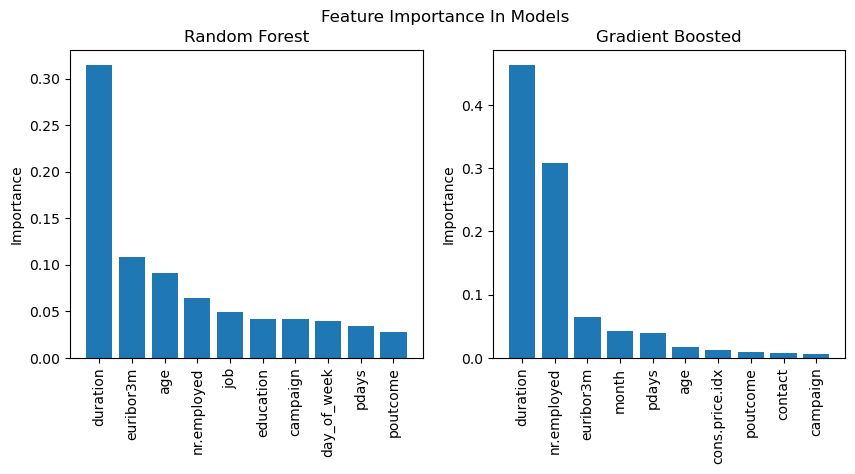

In [5]:
#--- Write your code here ---#

# Number of features to plot
n = 10

# Get names of features
features = df.columns[df.columns != 'y']

# Get the importance of the features
ranking_random_forest = best_random_forest.feature_importances_
ranking_gradient_boosted = best_gradient_boosted.feature_importances_

# Pair the feature to the importance
pairs_random_forest = {features[k]:ranking_random_forest[k] for k in range(features.size)}
pairs_gradient_boosted = {features[k]:ranking_gradient_boosted[k] for k in range(features.size)}

# Sort the dictionaries
sorted_random_forest = dict(sorted(pairs_random_forest.items(), key=lambda item: item[1], reverse=True)[:n])
sorted_gradient_boosted = dict(sorted(pairs_gradient_boosted.items(), key=lambda item: item[1], reverse=True)[:n])

# Plot the n most important features with their importance
plt.figure(1, figsize=[10, 4])
plt.subplot(1, 2, 1)
plt.bar(sorted_random_forest.keys(), sorted_random_forest.values())
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Random Forest')
plt.subplot(1, 2, 2)
plt.bar(sorted_gradient_boosted.keys(), sorted_gradient_boosted.values())
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Gradient Boosted')
plt.suptitle('Feature Importance In Models')
plt.show()


### Task 6 (Non-Mandatory): Test Model Robustness to Noisy Features

Add synthetic noise features to the dataset. 
Generate 5–10 random columns with values sampled from a uniform or normal distribution.
Concatenate them with the original feature set.
Retrain your Random Forest and Gradient Boosting with the noisy features included.
Evaluate their performance on the test set.

Create a Bar plot comparing test set accuracy or F1 score before adding noise and after adding noise. 

**Discuss:** Did model performance degrade? Why or why not?

What does this tell you about the model’s ability to ignore irrelevant features?

Would feature selection or regularization help in this case?

--- Your answer here --- 

**Not finished!**

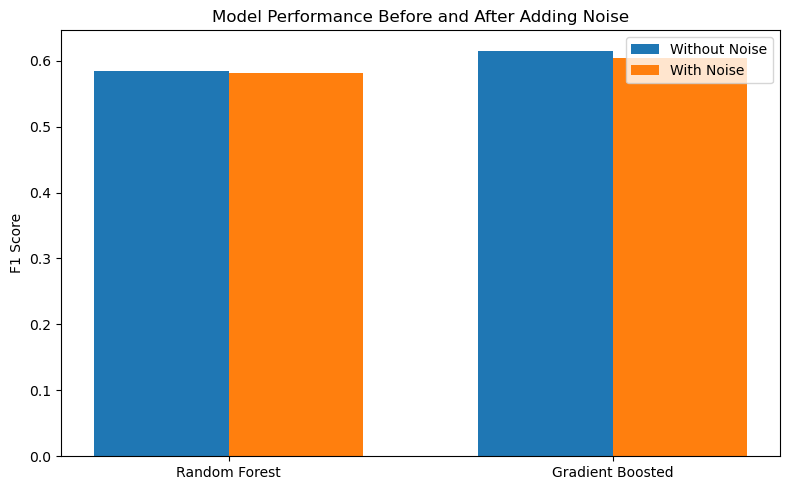

In [6]:
#--- Write your code here ---#

# Decision wether to include feature 'duration' or not
include_duration = True

if include_duration:
    X_mask = ~df.columns.isin(['y'])
else:
    X_mask = ~df.columns.isin(['y', 'duration'])

y_mask = df.columns.isin(['y'])

X = df.loc[:, X_mask].columns
y = df.loc[:, y_mask].columns
X = df[X].to_numpy()
y = df[y].to_numpy()

# Split data without noise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


# Number of columns with noise to create
cols = 5

# Create noisy data
noise = np.random.rand(df.shape[0], 1)
for k in range(cols - 1):
    temp_column = np.random.rand(df.shape[0], 1)
    noise = np.c_[noise, temp_column]

noisy_data = np.c_[X, noise]

# Split data without noise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Split data with noise
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(noisy_data, y, test_size=0.2, random_state=42, shuffle=True)

# Train models with the best parameters found before in task 4
best_random_forest = RandomForestClassifier(**grid_search_random_forest.best_params_)
best_gradient_boosted = GradientBoostingClassifier(**grid_search_gradient_boosted.best_params_)

best_random_forest_noise = RandomForestClassifier(**grid_search_random_forest.best_params_)
best_gradient_boosted_noise = GradientBoostingClassifier(**grid_search_gradient_boosted.best_params_)

best_random_forest.fit(X_train, y_train.ravel())
best_gradient_boosted.fit(X_train, y_train.ravel())

best_random_forest_noise.fit(X_train_noise, y_train_noise.ravel())
best_gradient_boosted_noise.fit(X_train_noise, y_train_noise.ravel())

random_forest_predictions = best_random_forest.predict(X_test)
gradient_boosted_predictions = best_gradient_boosted.predict(X_test)
random_forest_predictions_noise = best_random_forest_noise.predict(X_test_noise)
gradient_boosted_predictions_noise = best_gradient_boosted_noise.predict(X_test_noise)

random_forest_f1 = metrics.f1_score(y_test, random_forest_predictions)
gradient_boosted_f1 = metrics.f1_score(y_test, gradient_boosted_predictions)
random_forest_noise_f1 = metrics.f1_score(y_test_noise, random_forest_predictions_noise)
gradient_boosted_noise_f1 = metrics.f1_score(y_test_noise, gradient_boosted_predictions_noise)

no_noise = [random_forest_f1, gradient_boosted_f1]
noise = [random_forest_noise_f1, gradient_boosted_noise_f1]

x = np.arange(len(['Random Forest', 'Gradient Boosted']))

plt.figure(figsize=(8, 5))
plt.bar(x - 0.35/2, no_noise, 0.35, label='Without Noise')
plt.bar(x + 0.35/2, noise, 0.35, label='With Noise')
plt.ylabel('F1 Score')
plt.title('Model Performance Before and After Adding Noise')
plt.xticks(x, ['Random Forest', 'Gradient Boosted'])
plt.legend()
plt.tight_layout()
plt.show()


## Lecture 7 - Kernels, Maximal Margin Classifiers

### Task 1 (Mandatory): Data Exploration and Preprocessing

Load the dataset using sklearn.datasets.load_breast_cancer().

Standardize the features using StandardScaler.
Use pairplot or PCA to project to 2D and show class separation.

**Discuss:** Do the two classes appear linearly separable?
 
--- Your answer here --- 

The two resulting classes seem to be linearly separable but not with a very high accuracy since there is a lot of overlapping.

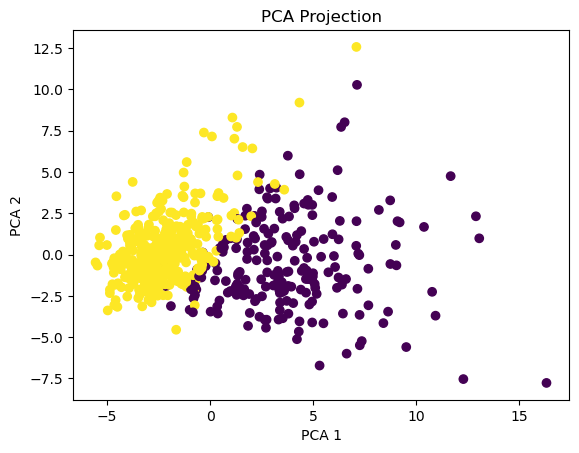

In [7]:
#--- Write your code here ---#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer

X_true, y = load_breast_cancer(return_X_y=True)

scaler = StandardScaler()

X = scaler.fit_transform(X_true)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection')
plt.show()

### Task 2 (Mandatory): Train Linear and RBF SVMs

Train two SVM classifiers: one with a linear kernel and one with an RBF kernel.

Use a fixed C=1.0, and for RBF, use default gamma='scale'.

Plot the confusion matrices or classification reports for both models.

**Discuss:** Which kernel performed better? Why might that be?

--- Your answer here --- 

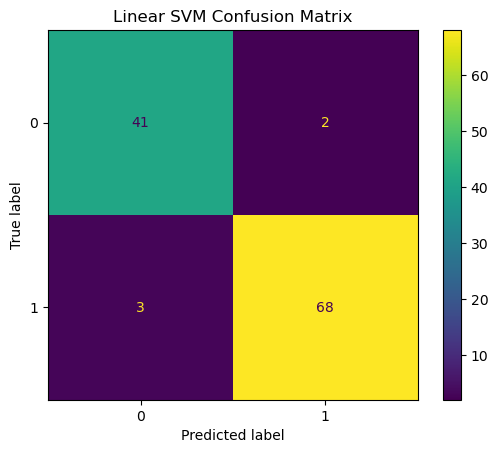

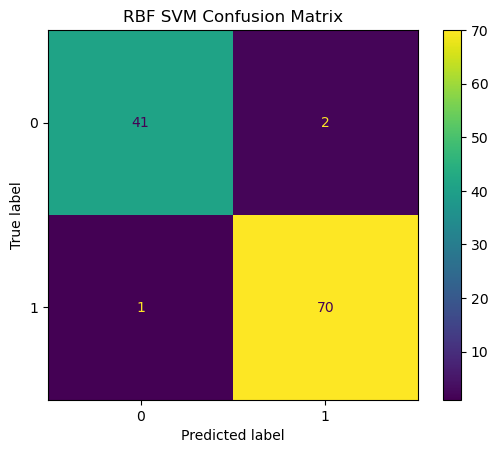

In [8]:
#--- Write your code here ---#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

linear_svm = SVC(kernel='linear', C=1.0, gamma='scale')
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')

linear_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)

linear_prediction = linear_svm.predict(X_test)
rbf_prediction = rbf_svm.predict(X_test)

cm_linear = confusion_matrix(y_test, linear_prediction)
disp_linear = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
disp_linear.plot()
plt.title("Linear SVM Confusion Matrix")
plt.show()

# Confusion matrix for RBF SVM
cm_rbf = confusion_matrix(y_test, rbf_prediction)
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
disp_rbf.plot()
plt.title("RBF SVM Confusion Matrix")
plt.show()

### Task 3 (Mandatory): Hyperparameter Tuning

Use grid search with cross-validation to find optimal values of C and gamma for the RBF kernel.

Plot a heatmap of validation accuracy or F1 score for the grid.

**Discuss:** What combination of hyperparameters gave the best results?

--- Your answer here --- 

Best parameters {'C': 10, 'gamma': 0.01} with an f1-score of 0.9760952436807225


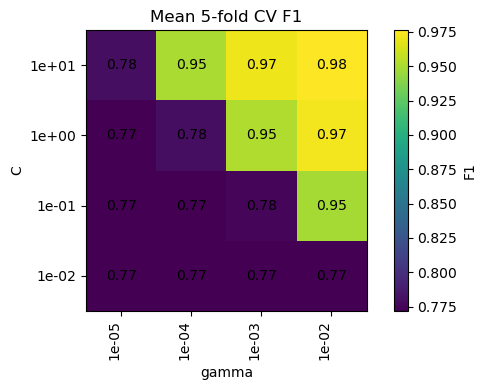

In [9]:
#--- Write your code here ---#

rbf_svm = SVC(kernel='rbf')

C = [0.01, 0.1, 1, 10]
gamma = [0.00001, 0.0001, 0.001, 0.01]

parameter_space = {
    'C' : C,
    'gamma' : gamma
}

rbf_gridsearch = GridSearchCV(estimator=rbf_svm,
                              param_grid=parameter_space,
                              n_jobs=-1,
                              cv=2,
                              return_train_score=True,
                              scoring='f1')

rbf_gridsearch.fit(X_train, y_train.ravel())

f1_scores = rbf_gridsearch.cv_results_["mean_test_score"].reshape(len(gamma), len(C))

print(f'Best parameters {rbf_gridsearch.best_params_} with an f1-score of {rbf_gridsearch.best_score_}')

fig, ax = plt.subplots(figsize=[6, 4])
im = ax.imshow(f1_scores, origin='lower', cmap='viridis')

ax.set_xticks(range(len(gamma)))
ax.set_yticks(range(len(C)))
ax.set_xticklabels([f"{g:.0e}" for g in gamma], rotation=90, ha="right")
ax.set_yticklabels([f"{c:.0e}" for c in C])
ax.set_xlabel("gamma")
ax.set_ylabel("C")
ax.set_title("Mean 5-fold CV F1")

for i in range(len(C)):
    for j in range(len(gamma)):
        ax.text(j, i, f"{f1_scores[i, j]:.2f}",
                ha="center", va="center",
                color="white" if f1_scores[i, j] < f1_scores.max()/2 else "black")

fig.colorbar(im, ax=ax, label="F1")
plt.tight_layout()
plt.show()


### Task 4 (non-mandatory): Investigate the Effect of the Regularization Parameter C

Train RBF SVM models for a wide range of C values (e.g., 0.001, 0.01, 0.1, 1, 10, 100), keeping gamma fixed.

For each model, record training and test accuracy or F1 score.

Plot the training and test scores vs. C (line plot).

**Discuss:**

- What happens when C is very small or very large?

- What does this tell you about the role of C in the SVM objective?

--- Your answer here --- 

In [10]:
#--- Write your code here ---#

### Task 5 (non-mandatory): Compare SVM with Logistic Regression

Train a logistic regression model on the same (standardized) data.

Compare its performance with your best-performing SVM.

Plot, side-by-side bar plot of accuracy, precision, recall, and F1 score for both models.

**Discuss:**

- Which model performed better overall?

- Were there significant differences in false positives or false negatives?

- Based on your task (e.g., cancer detection), which type of error is more costly?

In [11]:
#--- Write your code here ---#

## Lecture 8 - Clustering (All Mandatory)

In this assignment you will implement an unsupervised learning method, then you will test it with data sets of your choice. 

You must deliver the results in a jupyter notebook, combining the code, text, and images in a nice readable sequence.

**Goal:** Implement the clustering algorithm called Bisecting k-Means.
Bisecting k-Means [1] is a clustering algorithm that combines hierarchical clustering with k-Means. However, differently than the hierarchical clustering we saw in the lecture, it uses a divisive, top-down approach (instead of the agglomerative, bottom-up that we are used to). It consists on the steps described below:

1. Start with a single cluster including all the observations in the data set.
2. [Bisecting] Divide the largest cluster into two smaller sub-clusters using k-Means.
3. Redo the bisecting step iter times and choose the best solution according to the Sum of Squared Errors (SSE).
4. Repeat from Step 2 until you have k clusters.

Implement the Bisecting k-Means algorithm in a function called bkmeans. It should take as input: (a) the data X to cluster, as a n × p matrix (n observations by p features); (b) the number k of clusters; and (c) the number iter of iterations for step 3. It should generate as output a n × 1 vector with the cluster indices for each of the n observations.
Notes:
1. You must implement K-Means yourself, from scratch.
2. The requirements are strict. I will use standard test cases in order to test your solution by calling the function
bkmeans as described.

[1] M. Steinbach, G. Karypis, V. Kumar et al., “A comparison of document clustering techniques,” in
KDD workshop on text mining, vol. 400, no. 1. Boston, 2000, pp. 525–526. [Online]. Available:
http://glaros.dtc.umn.edu/gkhome/fetch/papers/docclusterKDDTMW00.pdf

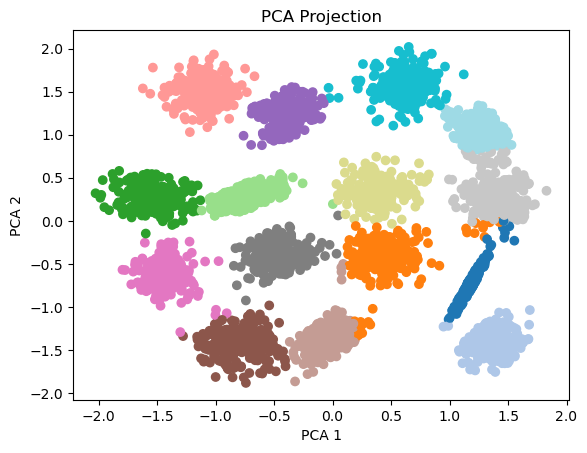

In [13]:
#--- Write your code here ---#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def kmeans(X, k, max_iter=100):

    # Set often used variables
    samples, dimensions = X.shape[0], X.shape[1]

    # Construct a vector to randomly assign each datapoint to one of k clusters
    cluster = np.random.randint(0, k, samples)

    # Initialize the loop
    centroids = np.empty((k, dimensions))
    last_centroids = np.empty(centroids.shape)

    for _ in range(max_iter):

        # Set last computed centroids
        last_centroids = centroids.copy()

        # Compute new centroids
        for i in range(k):
            points = X[cluster == i]

            # Handle 'collapsing' centroids
            if len(points) == 0:
                centroids[i] = X[np.random.randint(0, samples)]
            else:
                centroids[i] = np.mean(points, axis=0)

        # Compute the distances between each point and each centroid
        distances = np.empty((samples, k))
        for c in range(k):

            dist = np.linalg.norm(X - centroids[c, :], axis=1)
            distances[:, c] = dist
        
        # Reassign each datapoint to the new nearest cluster
        cluster = np.argmin(distances, axis=1)

        # Check if K-means has converged
        if np.all(centroids == last_centroids):
            break
    
    distances = X - centroids[cluster]
    sse = np.sum(np.square(distances))

    return cluster, sse

def bkmeans(X, k, iterations):
    
    # Set often used variables
    samples = X.shape[0]

    # Construct a vector to assign each datapoint to original cluster
    cluster = np.zeros(samples)

    # Start looping through the splitting
    for split in range(k-1):
        
        # Find the biggest cluster assuming biggest meaning the cluster with the highest number of points inside
        values, counts = np.unique(cluster, return_counts=True)
        biggest_cluster = values[np.argmax(counts)]

        # Shift all clusters to have the biggest_cluster-index at the biggest value
        diff = max(cluster) - biggest_cluster
        cluster = (cluster + diff) % (max(cluster) + 1)
        biggest_cluster = max(cluster)

        # Find all points in the biggest cluster
        points = cluster == biggest_cluster
        X_partition = X[points]
        
        # Create empty list/array for finding best split
        list_of_new_clusters = []
        list_of_sse = np.empty(shape=iterations)

        # Find the best split using Sum of Squared Errors
        for c in range(iterations):
            new_clusters, sse = kmeans(X_partition, 2)
            list_of_new_clusters += [new_clusters]
            list_of_sse[c] = sse
        minimum = np.argmin(list_of_sse)

        # Update the cluster by splitting it with K-means
        # and adding the corresponding index-values to not mix cluster-indexes
        # since K-means returns indexes 0, 1, 2, ..., k
        cluster[points] = list_of_new_clusters[minimum] + split

    return cluster


# Get the data
data = np.genfromtxt(r'datasets\your_datasets\S1.csv', delimiter='   ', skip_header=0)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(data)

# Get the labels for which cluster each point belongs to
labels = bkmeans(X, 15, 10)

# Plot the figure
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection')
plt.show()

## Lecture 9 - Dimensionality Reduction 

### Task 1 (mandatory)

In this exercise you will visualize and explore the results of the previous exercise in a simple manner, using scatterplots.
This will be a relatively open-ended task; you will choose three data sets and explore them with the new technique you built for yourself. 

These could be data sets you already used in previous assignments, or you could download some
new data. The only restrictions are that (a) the data sets must be multidimensional (i.e., more than 4 features), (b) they must have labels, and (c) they must have at least 1000 data points.

These are some examples of interesting places to obtain new data sets:

* http://archive.ics.uci.edu/ml/index.php
* https://www.openml.org/search?type=data
* https://www.kaggle.com/datasets

Be careful, however, with the size of the data set you choose. Python can get quite slow with too much data, and the scatterplots will also be very crowded, so go for smaller data sets this time.

**Important**: Download the datasets and put them under the folder *datasets* so that we can run your code.

# Findings

Not too sure what it is I am supposed to be doing here but I have applied the BK-means method I did in the window above to three datasets I foud on the web.
I have plotted the predicted clusters and the true clusters and it looks like the predictions are very bad.

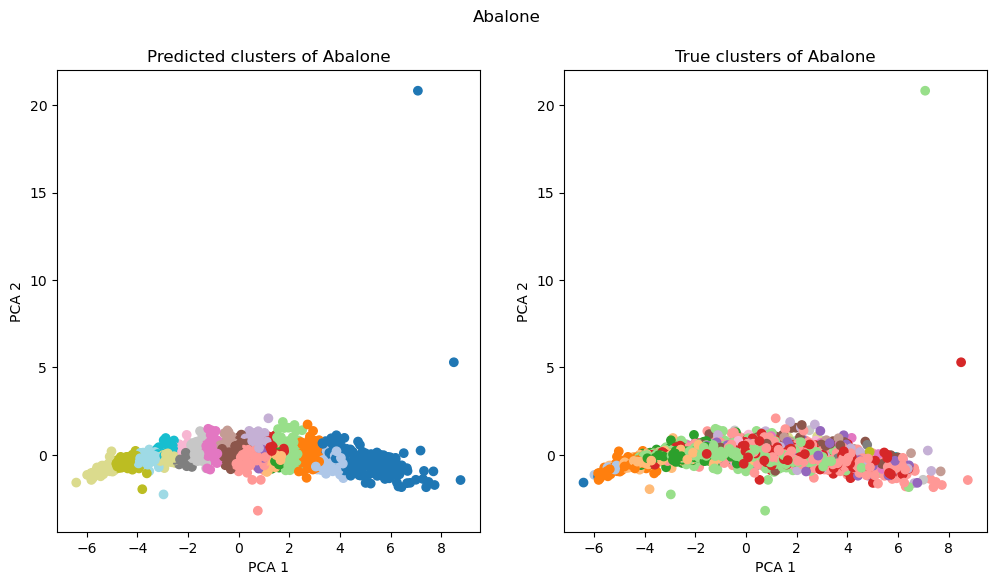

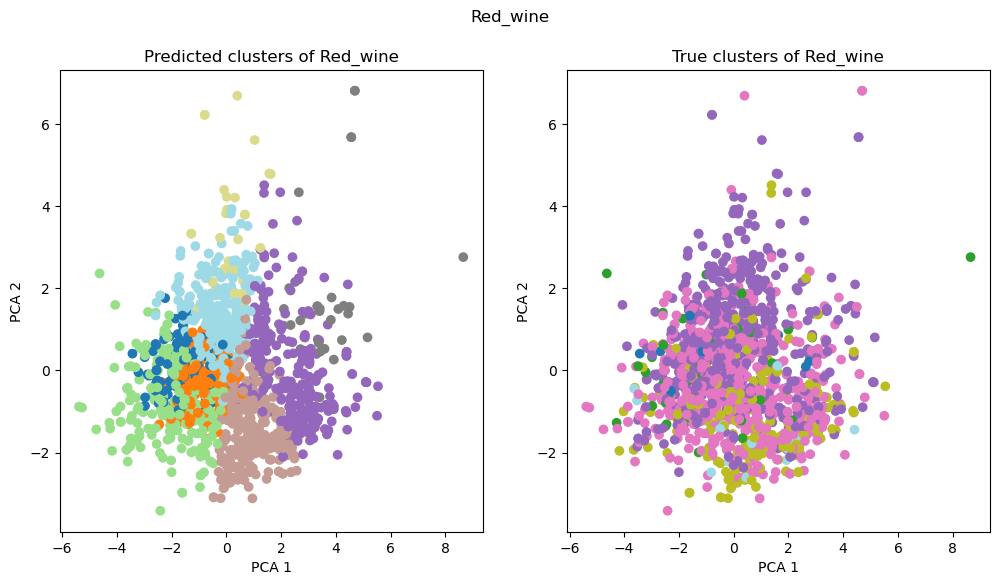

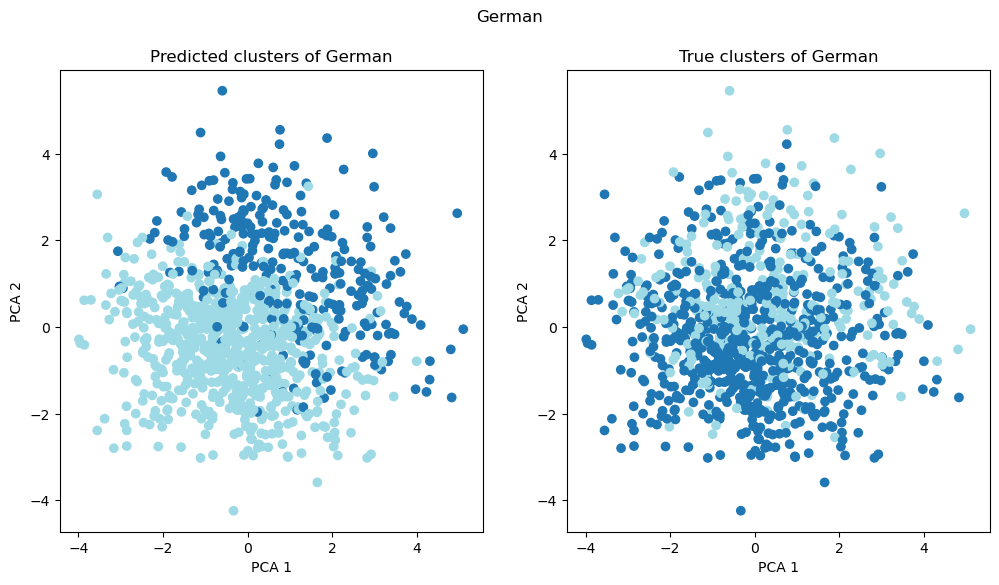

In [14]:
#--- Write your code here ---#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def kmeans(X, k, max_iter=100):

    # Set often used variables
    samples, dimensions = X.shape[0], X.shape[1]

    # Construct a vector to randomly assign each datapoint to one of k clusters
    cluster = np.random.randint(0, k, samples)

    # Initialize the loop
    centroids = np.empty((k, dimensions))
    last_centroids = np.empty(centroids.shape)

    for _ in range(max_iter):

        # Set last computed centroids
        last_centroids = centroids.copy()

        # Compute new centroids
        for i in range(k):
            points = X[cluster == i]

            # Handle 'collapsing' centroids
            if len(points) == 0:
                centroids[i] = X[np.random.randint(0, samples)]
            else:
                centroids[i] = np.mean(points, axis=0)

        # Compute the distances between each point and each centroid
        distances = np.empty((samples, k))
        for c in range(k):

            dist = np.linalg.norm(X - centroids[c, :], axis=1)
            distances[:, c] = dist
        
        # Reassign each datapoint to the new nearest cluster
        cluster = np.argmin(distances, axis=1)

        # Check if K-means has converged
        if np.all(centroids == last_centroids):
            break
    
    distances = X - centroids[cluster]
    sse = np.sum(np.square(distances))

    return cluster, sse

def bkmeans(X, k, iterations):
    
    # Set often used variables
    samples = X.shape[0]

    # Construct a vector to assign each datapoint to original cluster
    cluster = np.zeros(samples)

    # Start looping through the splitting
    for split in range(k-1):
        
        # Find the biggest cluster assuming biggest meaning the cluster with the highest number of points inside
        values, counts = np.unique(cluster, return_counts=True)
        biggest_cluster = values[np.argmax(counts)]

        # Shift all clusters to have the biggest_cluster-index at the biggest value
        diff = max(cluster) - biggest_cluster
        cluster = (cluster + diff) % (max(cluster) + 1)
        biggest_cluster = max(cluster)

        # Find all points in the biggest cluster
        points = cluster == biggest_cluster
        X_partition = X[points]
        
        # Create empty list/array for finding best split
        list_of_new_clusters = []
        list_of_sse = np.empty(shape=iterations)

        # Find the best split using Sum of Squared Errors
        for c in range(iterations):
            new_clusters, sse = kmeans(X_partition, 2)
            list_of_new_clusters += [new_clusters]
            list_of_sse[c] = sse
        minimum = np.argmin(list_of_sse)

        # Update the cluster by splitting it with K-means
        # and adding the corresponding index-values to not mix cluster-indexes
        # since K-means returns indexes 0, 1, 2, ..., k
        cluster[points] = list_of_new_clusters[minimum] + split

    return cluster


# Get the data
abalone = np.genfromtxt(r'datasets\your_datasets\abalone_data.csv', delimiter=',', skip_header=0)[:, 1:-1]
abalone_y = np.genfromtxt(r'datasets\your_datasets\abalone_data.csv', delimiter=',', skip_header=0)[:, -1]
red_wine = np.genfromtxt(r'datasets\your_datasets\winequality-red.csv', delimiter=';', skip_header=1)[:, :-1]
red_wine_y = np.genfromtxt(r'datasets\your_datasets\winequality-red.csv', delimiter=';', skip_header=1)[:, -1]
german = np.genfromtxt(r'datasets\your_datasets\german_data_numeric.csv', delimiter=',', skip_header=0)[:, :-1]
german_y = np.genfromtxt(r'datasets\your_datasets\german_data_numeric.csv', delimiter=',', skip_header=0)[:, -1]

dataset = [(abalone, abalone_y), (red_wine, red_wine_y), (german, german_y)]
titles = ['Abalone', 'Red_wine', 'German']

for index, data in enumerate(dataset):

    # Normalize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(data[0])

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Get the labels for which cluster each point belongs to
    labels = bkmeans(X, int(max(data[1])), 10)

    # Plot the figure
    plt.figure(index + 1, figsize=[12, 6])
    plt.subplot(1, 2, 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab20')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(f'Predicted clusters of {titles[index]}')
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data[1], cmap='tab20')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(f'True clusters of {titles[index]}')
    plt.suptitle(f'{titles[index]}')
    plt.show()

### Task 2 (non-mandatory) - Comparison of DR Techniques

Generate a scatterplot matrix comparing the results of three DR techniques: PCA, MDS, and t-SNE, for each data set chosen in the previous exercise. 
The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of a DR technique applied to a data set. 
Color the points by their target variables (i.e., class/labels) using a qualitative colormap.

Then answer this shortly (in a couple of paragraphs): 
- In your opinion, which technique performed the best for each data set, regarding the separation of the classes? 
- How are the classes in the data sets separated? 
- Are some classes easier to separate than others?


### Task 3 (non-mandatory): Comparison of Clustering Techniques

Choose one of the DR techniques from the previous exercise and generate a similar scatterplot matrix to compare the results of Bisecting k-Means with classic k-Means and hierarchical clustering for each data set. 
The resulting visualization should be a 3 × 3 matrix where each cell is a scatterplot of the chosen DR technique applied to a data set, with the colors of the points showing the clusters using a qualitative colormap (see, e.g., https://matplotlib.org/tutorials/colors/colormaps.html).

Then answer this shortly (in a couple of paragraphs): 
- In your opinion, which clustering technique performed the best for each data set? 
- How are the clusters in the data sets separated? 
- Are some clusters easier to separate than others?